<a href="https://colab.research.google.com/github/sweetyjunnarkar/News_topic_modeling/blob/main/Sweety_Junnarkar_Topic_Modeling_on_News_Articles_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

## <b> Data Description </b>

### The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import string
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import gensim
import gensim.corpora as corpora
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import spacy
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [6]:
News=[]
Type=[]
path="/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/Topic Modeling on News Article/Copy of bbc"
folders=["business","entertainment","politics","sport","tech"] 
for i in folders:
    files=os.listdir(path+'/'+i)
    for text_file in files:
        file_path=path + '/'+i+'/'+text_file
        with open(file_path,'rb') as f:
            data=f.read().decode(errors='replace')
        News.append(data)
        Type.append(i)

data={'news':News,'type':Type}
df = pd.DataFrame(data)

In [8]:
df.head()

,news,type
0,HealthSouth ex-boss goes on trial\n\nThe forme...,business
1,Aids and climate top Davos agenda\n\nClimate c...,business
2,Euro firms miss out on optimism\n\nMore than 9...,business
3,UK economy ends year with spurt\n\nThe UK econ...,business
4,China now top trader with Japan\n\nChina overt...,business


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   news    2225 non-null   object
 1   type    2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [10]:
df.shape

(2225, 2)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


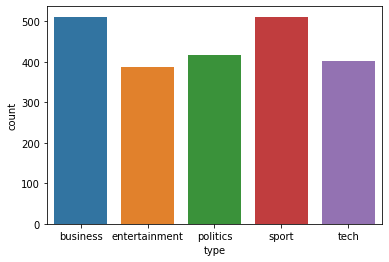

In [11]:
sns.countplot(df.type)

In [12]:
news_df=df.copy()

In [13]:
news_df.head()

,news,type
0,HealthSouth ex-boss goes on trial\n\nThe forme...,business
1,Aids and climate top Davos agenda\n\nClimate c...,business
2,Euro firms miss out on optimism\n\nMore than 9...,business
3,UK economy ends year with spurt\n\nThe UK econ...,business
4,China now top trader with Japan\n\nChina overt...,business


In [14]:
new=news_df['news'][0]
new

'HealthSouth ex-boss goes on trial\n\nThe former head of US medical services firm HealthSouth overstated earnings and assets to boost the company\'s share price, it was claimed in court.\n\nRichard Scrushy, 52, is accused of "directing" a $2.7bn (£1.4bn) accounting fraud at the company he co-founded in Alabama in 1984. Prosecutors said he was motivated by wealth - spending about $200m between 1996 and 2002 while earning much less. Defence lawyers said Mr Scrushy had been deceived by other executives. Several former HealthSouth employees have already pleaded guilty to fraud and are expected to give evidence against Mr Scrushy.\n\n"We will present evidence that Richard Scrushy knew about the conspiracy, that he participated in the conspiracy and that he profited," prosecutor Alice Martin told the court. Mr Scrushy is the first chief executive to be tried for breaching the Sarbanes Oxley Act - a law introduced in the wake of the Enron and WorldCom frauds which obliges corporate bosses to 

In [15]:
new[0:]

'HealthSouth ex-boss goes on trial\n\nThe former head of US medical services firm HealthSouth overstated earnings and assets to boost the company\'s share price, it was claimed in court.\n\nRichard Scrushy, 52, is accused of "directing" a $2.7bn (£1.4bn) accounting fraud at the company he co-founded in Alabama in 1984. Prosecutors said he was motivated by wealth - spending about $200m between 1996 and 2002 while earning much less. Defence lawyers said Mr Scrushy had been deceived by other executives. Several former HealthSouth employees have already pleaded guilty to fraud and are expected to give evidence against Mr Scrushy.\n\n"We will present evidence that Richard Scrushy knew about the conspiracy, that he participated in the conspiracy and that he profited," prosecutor Alice Martin told the court. Mr Scrushy is the first chief executive to be tried for breaching the Sarbanes Oxley Act - a law introduced in the wake of the Enron and WorldCom frauds which obliges corporate bosses to 

In [16]:
news_df['news']=news_df['news'].astype('str')

In [17]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [18]:
news_df["filtered"] = news_df['news'].apply(remove_punctuations)

In [19]:
news_df

,news,type,filtered
0,HealthSouth ex-boss goes on trial\n\nThe forme...,business,HealthSouth exboss goes on trial\n\nThe former...
1,Aids and climate top Davos agenda\n\nClimate c...,business,Aids and climate top Davos agenda\n\nClimate c...
2,Euro firms miss out on optimism\n\nMore than 9...,business,Euro firms miss out on optimism\n\nMore than 9...
3,UK economy ends year with spurt\n\nThe UK econ...,business,UK economy ends year with spurt\n\nThe UK econ...
4,China now top trader with Japan\n\nChina overt...,business,China now top trader with Japan\n\nChina overt...
...,...,...,...
2220,Microsoft debuts security tools\n\nMicrosoft i...,tech,Microsoft debuts security tools\n\nMicrosoft i...
2221,Europe backs digital TV lifestyle\n\nHow peopl...,tech,Europe backs digital TV lifestyle\n\nHow peopl...
2222,A decade of good website design\n\nThe web loo...,tech,A decade of good website design\n\nThe web loo...
2223,Doors open at biggest gadget fair\n\nThousands...,tech,Doors open at biggest gadget fair\n\nThousands...


In [20]:
news_df.replace({ r'\A\s+|\s+\Z': '', '\n' : ' ','\\n':' '}, regex=True, inplace=True)

In [22]:
news_df['filtered'][0]

'HealthSouth exboss goes on trial  The former head of US medical services firm HealthSouth overstated earnings and assets to boost the companys share price it was claimed in court  Richard Scrushy 52 is accused of directing a 27bn £14bn accounting fraud at the company he cofounded in Alabama in 1984 Prosecutors said he was motivated by wealth  spending about 200m between 1996 and 2002 while earning much less Defence lawyers said Mr Scrushy had been deceived by other executives Several former HealthSouth employees have already pleaded guilty to fraud and are expected to give evidence against Mr Scrushy  We will present evidence that Richard Scrushy knew about the conspiracy that he participated in the conspiracy and that he profited prosecutor Alice Martin told the court Mr Scrushy is the first chief executive to be tried for breaching the Sarbanes Oxley Act  a law introduced in the wake of the Enron and WorldCom frauds which obliges corporate bosses to vouch for the accuracy of their c

In [25]:
import re
def rm_dig(news):
  a=[]
  for word in news.split():
    output = re.sub('[â£/0-9]+', '', word)
    a.append(output)
  return ' '.join(a)

In [26]:
news_df['filtered']=news_df['filtered'].apply(rm_dig)

In [27]:
news_df

,news,type,filtered
0,HealthSouth ex-boss goes on trial The former ...,business,HealthSouth exboss goes on trial The former he...
1,Aids and climate top Davos agenda Climate cha...,business,Aids and climate top Davos agenda Climate chan...
2,Euro firms miss out on optimism More than 90%...,business,Euro firms miss out on optimism More than of ...
3,UK economy ends year with spurt The UK econom...,business,UK economy ends year with spurt The UK economy...
4,China now top trader with Japan China overtoo...,business,China now top trader with Japan China overtook...
...,...,...,...
2220,Microsoft debuts security tools Microsoft is ...,tech,Microsoft debuts security tools Microsoft is r...
2221,Europe backs digital TV lifestyle How people ...,tech,Europe backs digital TV lifestyle How people r...
2222,A decade of good website design The web looks...,tech,A decade of good website design The web looks ...
2223,Doors open at biggest gadget fair Thousands o...,tech,Doors open at biggest gadget fair Thousands of...


In [41]:
def rm_sw(news):
  a= []
  sw = stopwords.words('english')
  sw.append("would")
  sw.append("could")
  sw.append('say')
  sw.append('mr')
  sw.append('year')
  for word in news.lower().split():
    if word not in sw:
      a.append(word)
  return ' '.join(a)

In [42]:
news_df['filtered']=news_df['filtered'].apply(rm_sw)

In [43]:
news_df['filtered'][0]

'healthsouth exboss go trial former head u medical service firm healthsouth overstate earnings asset boost companys share price claim court richard scrushy accuse direct bn bn accounting fraud company cofounded alabama prosecutor motivate wealth spending earn much less defence lawyer scrushy deceive executive several former healthsouth employee already plead guilty fraud expect give evidence scrushy present evidence richard scrushy knew conspiracy participate conspiracy profit prosecutor alice martin tell court scrushy first chief executive try breach sarbanes oxley act law introduce wake enron worldcom frauds obliges corporate boss vouch accuracy company result among charge face conspiracy commit fraud filing false statement money launder federal agent raid healthsouths office march company none past financial statement rely firm since reorganise board management team currently operate health clinic'

In [44]:
lemmatizer = WordNetLemmatizer()
nltk.download('averaged_perceptron_tagger')
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [45]:
news_df['filtered']=news_df['filtered'].apply(lemmatize_words)

In [46]:
news_df['filtered'][0]

'healthsouth exboss go trial former head u medical service firm healthsouth overstate earnings asset boost company share price claim court richard scrushy accuse direct bn bn accounting fraud company cofounded alabama prosecutor motivate wealth spending earn much less defence lawyer scrushy deceive executive several former healthsouth employee already plead guilty fraud expect give evidence scrushy present evidence richard scrushy knew conspiracy participate conspiracy profit prosecutor alice martin tell court scrushy first chief executive try breach sarbanes oxley act law introduce wake enron worldcom frauds obliges corporate bos vouch accuracy company result among charge face conspiracy commit fraud filing false statement money launder federal agent raid healthsouths office march company none past financial statement rely firm since reorganise board management team currently operate health clinic'

In [47]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

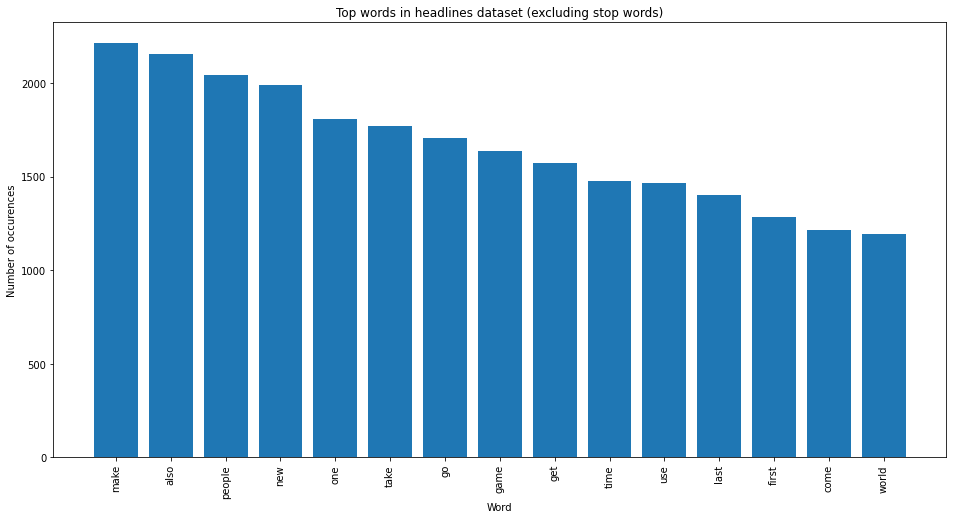

In [48]:
count_vectorizer = CountVectorizer()
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=news_df['filtered'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in headlines dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

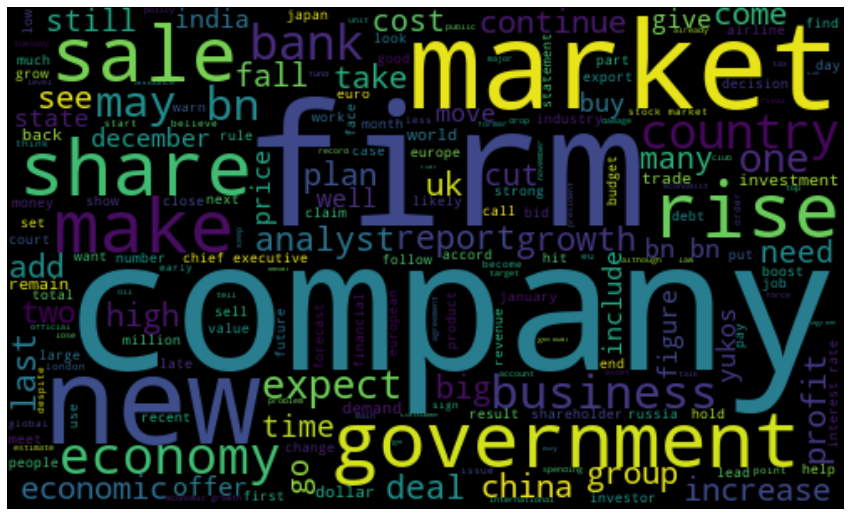

In [49]:
plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in news_df[news_df['type']=='business']['filtered']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

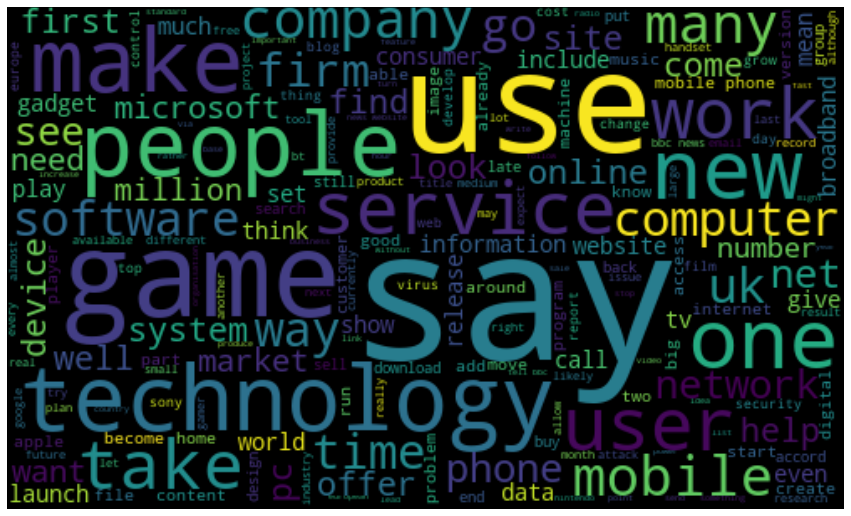

In [37]:
plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in news_df[news_df['type']=='tech']['filtered']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

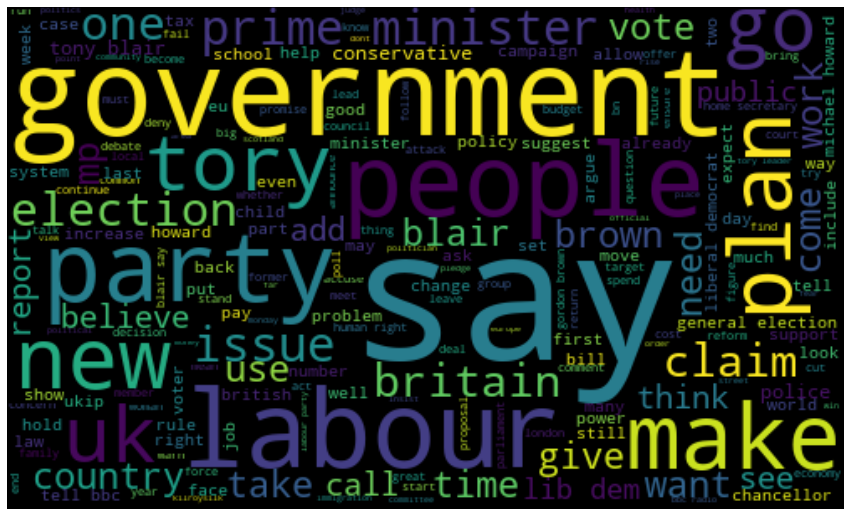

In [38]:
plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in news_df[news_df['type']=='politics']['filtered']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

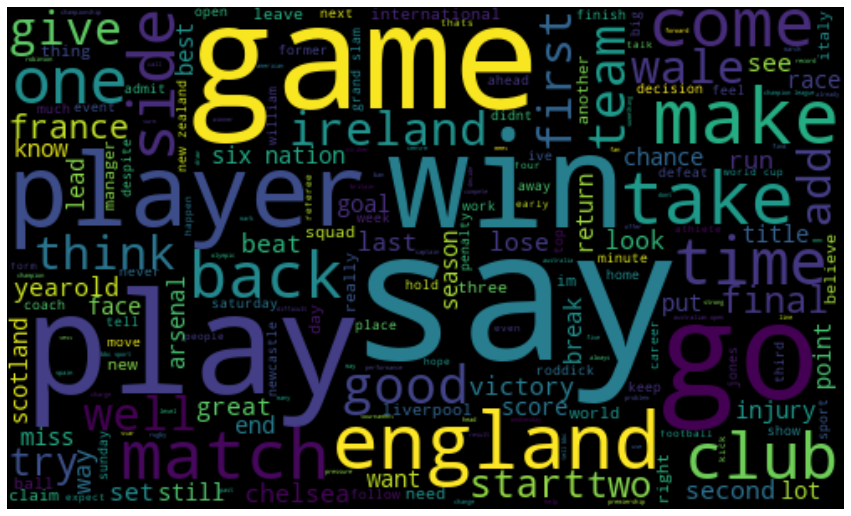

In [39]:
plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in news_df[news_df['type']=='sport']['filtered']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

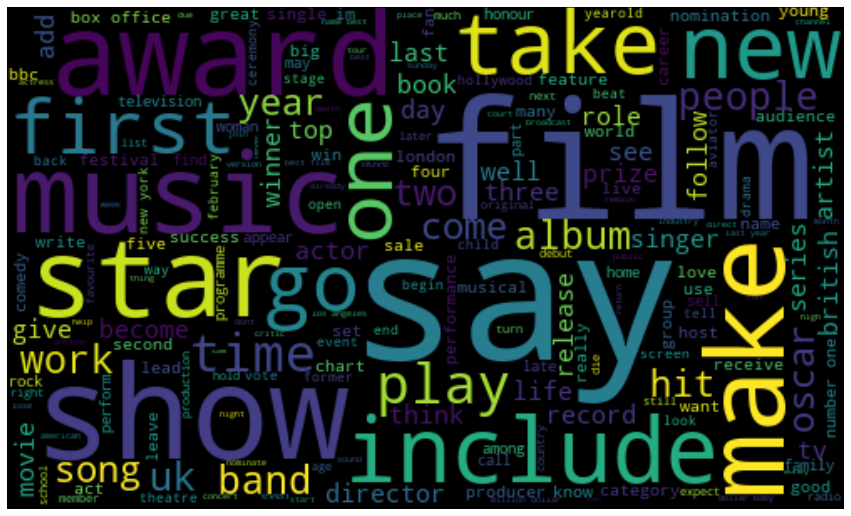

In [40]:
plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in news_df[news_df['type']=='entertainment']['filtered']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()